RAIN FALL PREDICTOR

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
#Loading data

data = pd.read_csv("austin_weather.csv")
data

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [4]:
#drop unnecessary columns
data = data.drop(["Date","Events","SeaLevelPressureLowInches"], axis=1)

In [5]:
data.head(10)

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T
5,57,48,39,39,36,33,79,63,47,30.47,30.4,10,9,7,12,3,17,0
6,60,53,45,41,39,37,83,65,47,30.46,30.39,10,9,7,7,1,11,T
7,62,51,40,43,39,33,92,64,36,30.33,30.17,10,10,7,10,2,14,T
8,64,50,36,49,41,28,92,76,60,30.31,30.1,10,10,4,17,5,24,0
9,44,40,35,31,26,21,75,60,45,30.44,30.33,10,10,10,13,5,21,0


In [9]:
data = data.replace('T',0)

In [10]:
data = data.replace('-',0)

In [11]:
data

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [12]:
#making another file for the changes occured

data.to_csv("austin_weather_final.csv")

In [13]:
#Importing libraries

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [14]:
data = pd.read_csv("austin_weather_final.csv")

In [15]:
data

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0.00
2,2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0.00
3,3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0.00
4,4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0.00
1315,1315,105,91,76,71,64,55,87,54,20,29.97,29.90,10,10,10,14,5,20,0.00
1316,1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0.00
1317,1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0.00


In [16]:
x = data.drop(["PrecipitationSumInches"], axis=1)

In [17]:
y = data["PrecipitationSumInches"]

In [18]:
y = y.values.reshape(-1,1)

In [19]:
y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

In [20]:
days_index = 798
days = [i for i in range (y.size)]

In [21]:
#Initialise the linear regression classifier
clf = LinearRegression()

#train the classifier
clf.fit(x,y)

LinearRegression()

The precipitation trend graph:


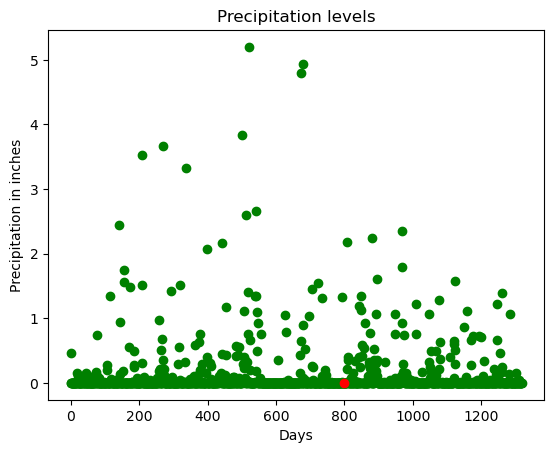

In [25]:
print("The precipitation trend graph:")
plt.scatter(days,y,color='g')
plt.scatter(days[days_index],y[days_index],color = 'r')
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
plt.title("Precipitation levels")
plt.plot();
x_vis = x.filter(['VisibilityAvgMiles','WindAvgMPH','PrecipitationSumInches','TempAvgF','DewPointAvgF','HumidityAvgPercent'])

The precipitation vs attributes trend graph:


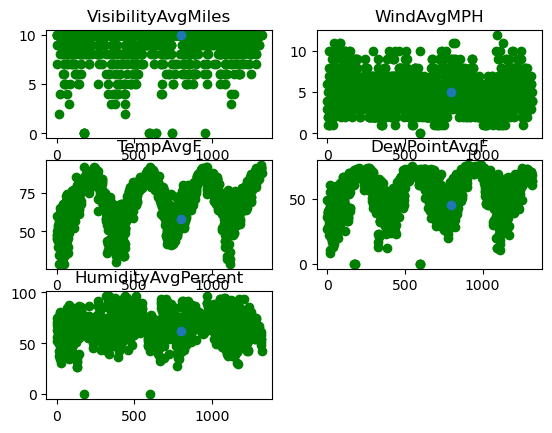

In [33]:
print("The precipitation vs attributes trend graph:")
for i in  range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],color = 'g')
    plt.scatter(days[days_index],x_vis[x_vis.columns.values[i]][days_index])
    plt.title(x_vis.columns.values[i])
plt.show()